In [26]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df=pd.read_csv(r"G:codes/udacity/project1/airbnb/reviews.csv")

In [8]:
import re
import string
#text preprocessing is crucial to get rid of all the unwanted punctuation marks, links and special characters
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

#cleaning and parsing the data, to make it easier to extract relevant information from the column
def text_preprocessing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text


In [10]:
df['comments']
df['text_clean'] = df['comments'].apply(str).apply(lambda x: text_preprocessing(x))


In [27]:
#Sentiment Analyzer helps understand and sentense and on the basis of it's understanding, it score the sentense 
#each word is given relevant score and then a combined score of the sentense is calculated 

sid = SentimentIntensityAnalyzer()
def get_score(text):
    dict_res = sid.polarity_scores(text)
    return dict_res["compound"]

df["Score"] = df["text_clean"].apply(lambda x: get_score(x))   


In [14]:
sentiment_df= pd.DataFrame()
#creating a new dataframe just for the comments and the score of respective score

In [16]:
sentiment_df["Score"] = df["Score"]

In [17]:
sentiment_df["comments"] = df["comments"]

In [19]:
sentiment_df = sentiment_df.sort_values(by = "Score")

In [21]:
sentiment_df['Compound'] = sentiment_df['Score'].apply(lambda c: 'pos' if c >=0 else 'neg')
#setting each comment as positive and negative 

In [23]:
sentiment_dist = sentiment_df['Compound'].value_counts()

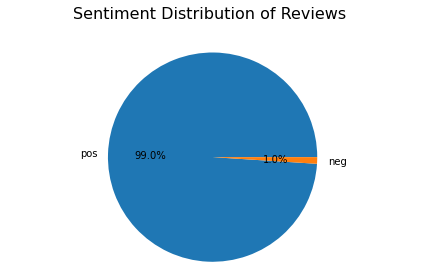

In [25]:
plt.pie(sentiment_dist, labels=sentiment_dist.index,
        autopct='%1.1f%%')
plt.title("Sentiment Distribution of Reviews \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.show()
#this shows that majority of the reviews were positive and the negative comments can then be further checked and make sure it does not happend again,
#focusing on the negative comments will let us know the points where improvement can be done and maximuze customer satisfaction
